## Funciones básicas de openCV

https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

In [1]:
# import the necessary packages
import imutils
import cv2
from cv_course import lib

import matplotlib.pyplot as plt
%matplotlib notebook

In [15]:
image = cv2.imread("../images/jurassic_park.png")
image.shape

(322, 600, 3)

<IPython.core.display.Javascript object>


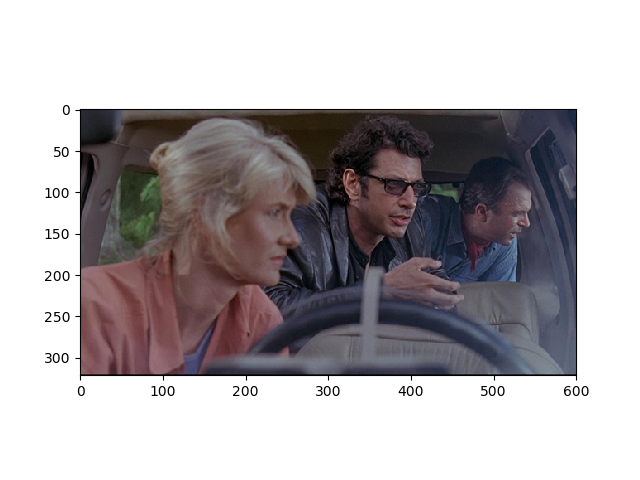

In [16]:
lib.plot(image)

__SUBIMAGE__

In [17]:
roi = image[60:160, 320:420]

<IPython.core.display.Javascript object>


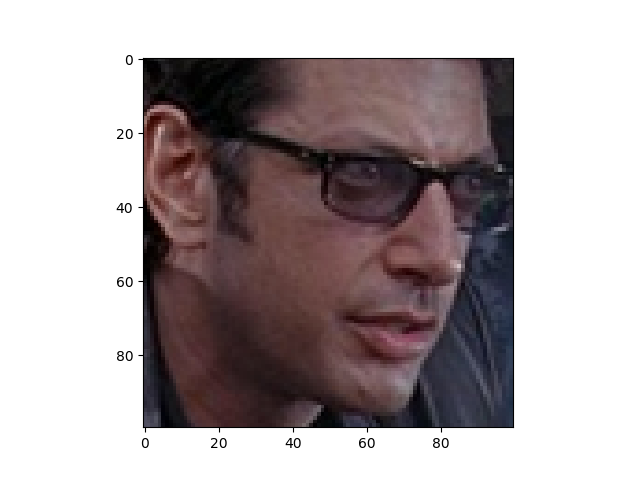

In [18]:
lib.plot(roi)

__RESIZE__

In [19]:
# ignoring aspect ratio
resized = cv2.resize(image, (200, 200))

<IPython.core.display.Javascript object>


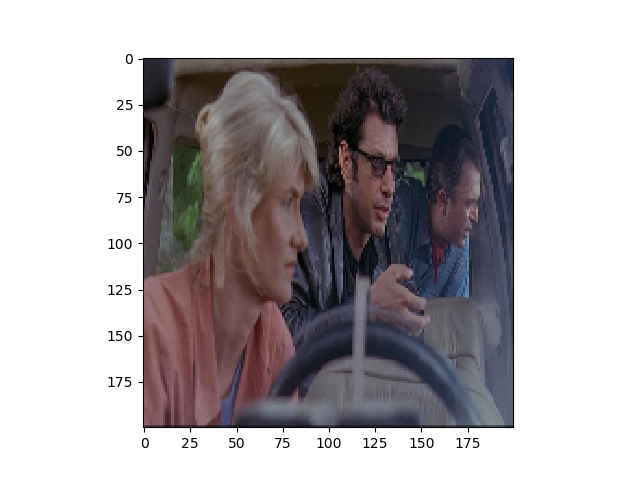

In [20]:
lib.plot(resized)

In [21]:
# with aspect ratio
resized = imutils.resize(image, height = 200)

<IPython.core.display.Javascript object>


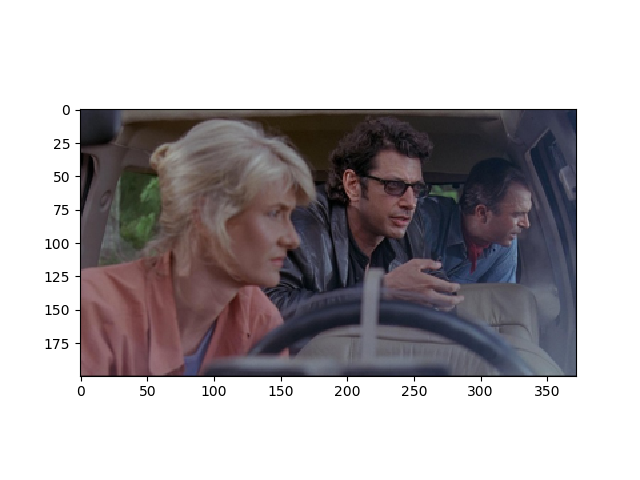

In [22]:
lib.plot(resized)

__ROTATE__

In [23]:
# no bound
rotated = imutils.rotate(image, -45)

<IPython.core.display.Javascript object>


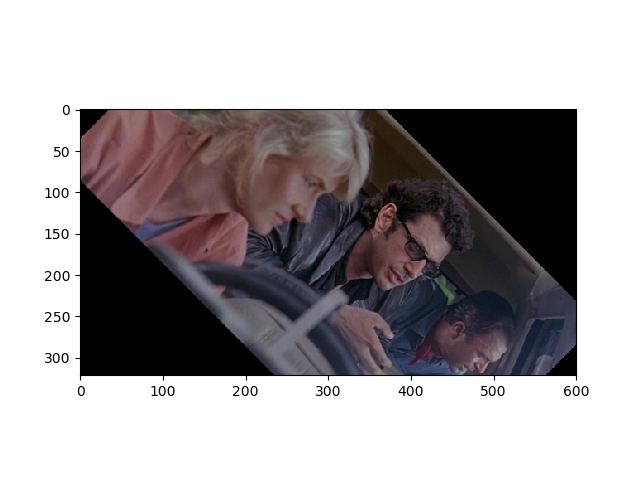

In [24]:
lib.plot(rotated)

In [25]:
# yes bound
rotated = imutils.rotate_bound(image, 45)

<IPython.core.display.Javascript object>


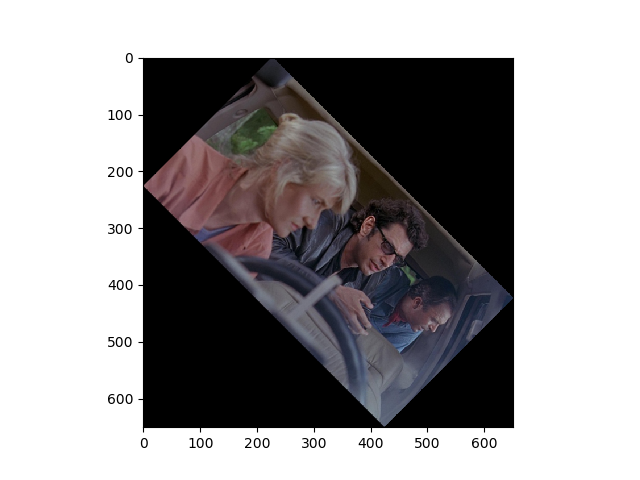

In [26]:
lib.plot(rotated)

__GAUSSIAN BLUR__

In [27]:
blurred = cv2.GaussianBlur(image, (11, 11), 0)

<IPython.core.display.Javascript object>


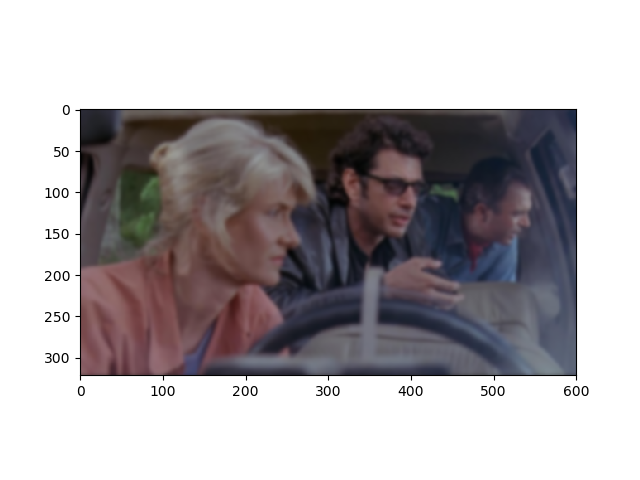

In [28]:
lib.plot(blurred)

__DRAW CIRCLE__

In [33]:
green_circle = image.copy()
cv2.circle(green_circle, (300, 150), 20, (0, 255, 0), -1);

<IPython.core.display.Javascript object>


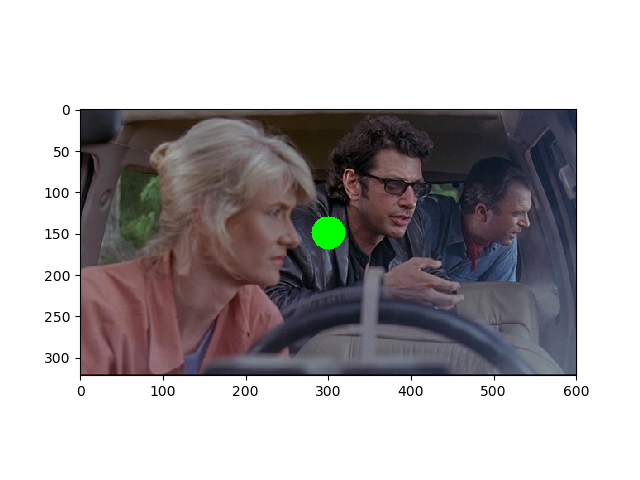

In [34]:
lib.plot(green_circle)

__DRAW LINE__

In [35]:
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5);

<IPython.core.display.Javascript object>


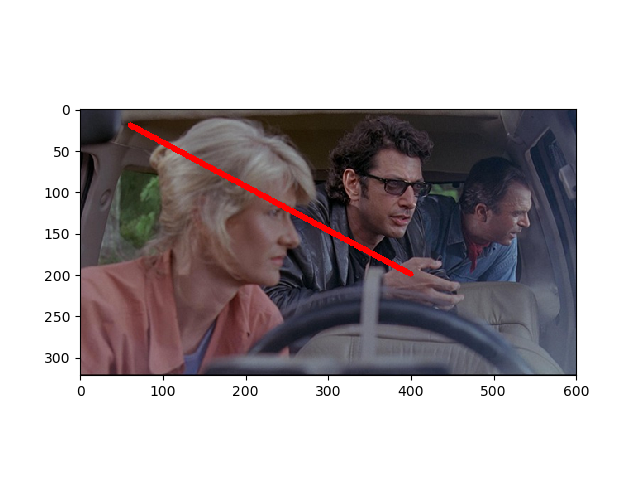

In [36]:
lib.plot(output)

__INSERT TEXT__

In [37]:
output = image.copy()
cv2.putText(output, "OpenCV + Jurassic Park + Sheriff!!!", (100, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2);

<IPython.core.display.Javascript object>


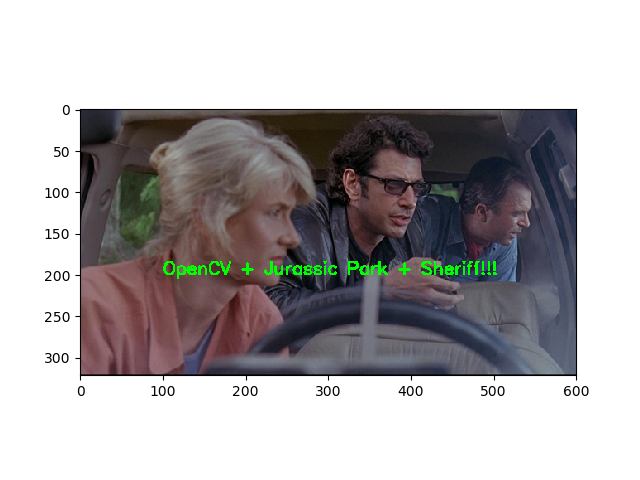

In [38]:
lib.plot(output)

## Más funciones

<IPython.core.display.Javascript object>


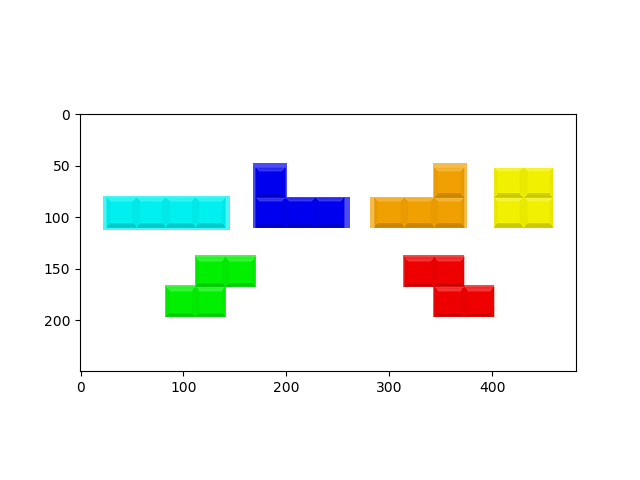

In [39]:
image = cv2.imread('../images/tetris_blocks.png')
lib.plot(image)S

__TO GRAY__

In [40]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>


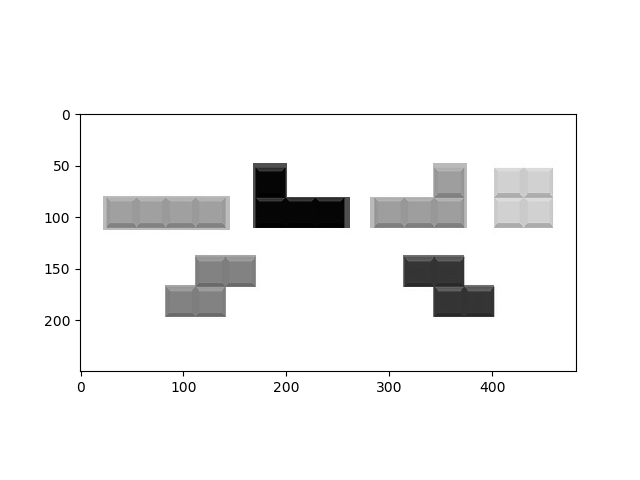

In [41]:
lib.plot(gray)

__FIND EDGES__

Canny kernel is roughly this:

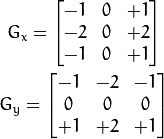

In [43]:
edged = cv2.Canny(gray, 30, 150)

<IPython.core.display.Javascript object>


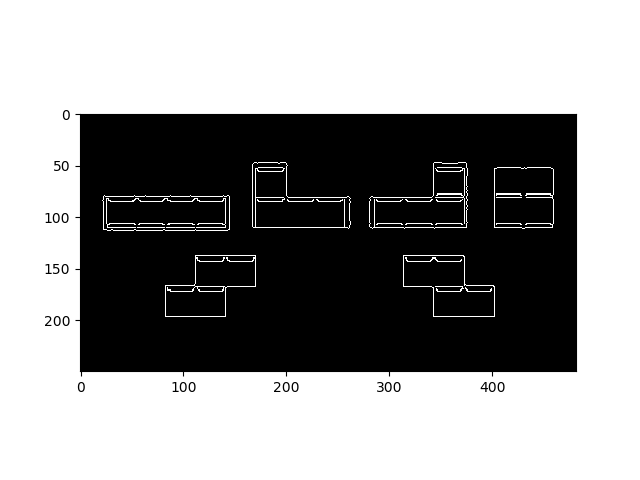

In [44]:
lib.plot(edged, gray=True)

__THRESHOLD TO BW__

In [45]:
# documentacion buena https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

<IPython.core.display.Javascript object>


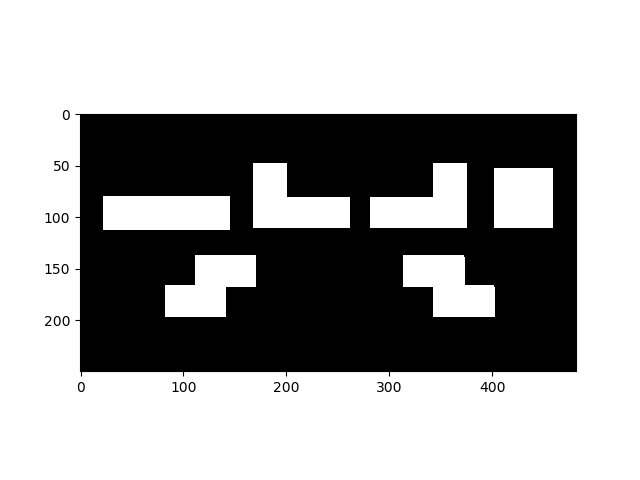

In [46]:
lib.plot(thresh)

__FIND CONTOURS__

In [47]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
output = image.copy()

# loop over the contours
for c in cnts:
    # draw each contour on the output image with a 3px thick purple outline, then display the output contours one at a time
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)    

# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (240, 0, 159), 2);

<IPython.core.display.Javascript object>


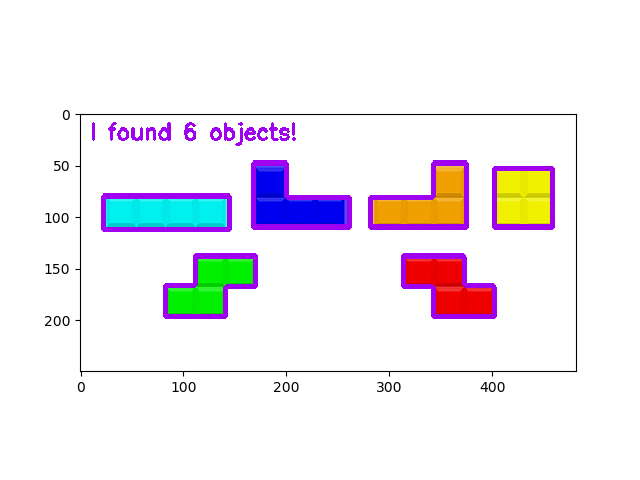

In [48]:
lib.plot(output)

__EROSION AND DILATION__

In [49]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)

<IPython.core.display.Javascript object>


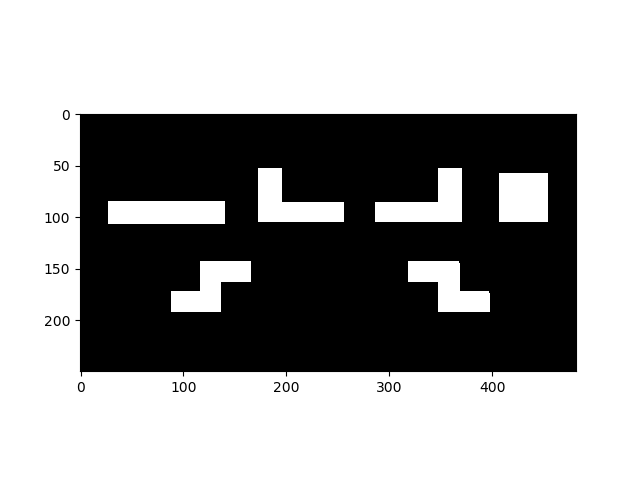

In [50]:
lib.plot(mask)

In [51]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)

<IPython.core.display.Javascript object>


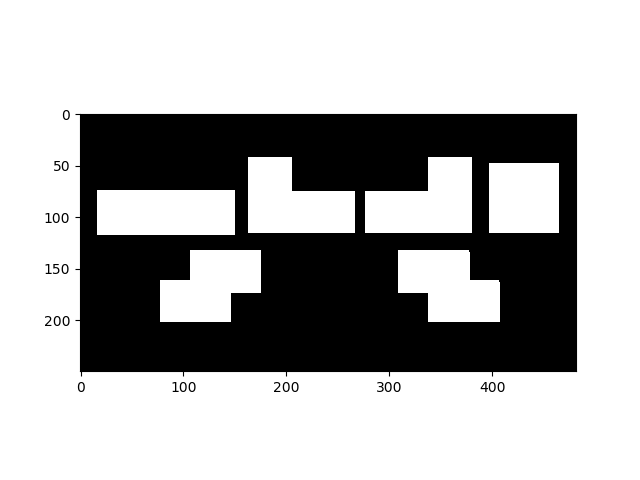

In [52]:
lib.plot(mask)

__BITWISE AND__

In [56]:
# keeping only the masked regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)

<IPython.core.display.Javascript object>


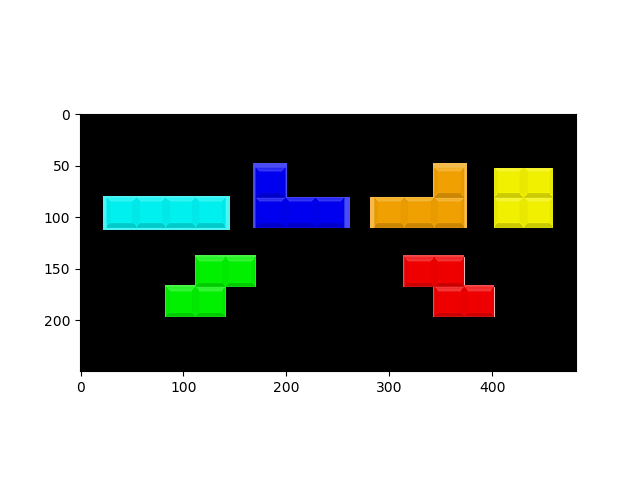

In [57]:
lib.plot(output)